In [46]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

# Load the Summer Palace photo
#china = imread('https://66.media.tumblr.com/647598e933587b4eea6c34f3f33a0f18/tumblr_inline_mw4qsqYbr71s7exj2.jpg')
china = imread('../resources/sudoku.jpg')

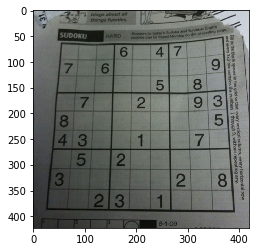

In [47]:
plt.imshow(china)

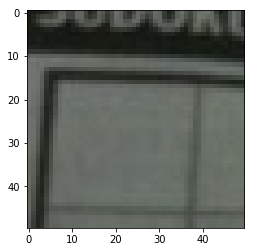

In [48]:
plt.imshow(china[50:100,50:100])

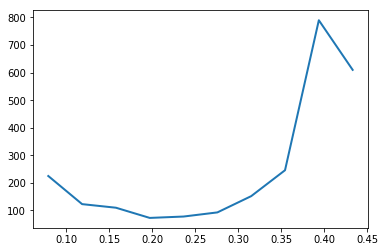

In [49]:
from skimage.filters import sobel
from skimage.color import rgb2grey

coins = rgb2grey(china[50:100,50:100])
hist = np.histogram(coins)
plt.plot(hist[1][:-1], hist[0], lw=2)
plt.show()
# edges = sobel(coins)
# markers = np.zeros_like(coins)

In [5]:
def flatten_image(coins):
    r,c = coins.shape
    coin1 = np.copy(coins)
    for row in range(r-1):
        for col in range(c-1):
            grid = []
            #r1
            if row-1 >= 0 & col-1 >= 0 & row-1 < r & col-1 < c:
                grid.append(coins[row-1][col-1])
            if row-1 >= 0 & col >= 0 & row-1 < r & col < c:
                grid.append(coins[row-1][col])
            if row-1 >= 0 & col+1 >= 0 & row-1 < r & col+1 < c:
                grid.append(coins[row-1][col+1])

            if row >= 0 & col-1 >= 0 & row < r & col-1 < c:
                grid.append(coins[row][col-1])
            if row >= 0 & col >= 0 & row < r & col < c: 
                grid.append(coins[row][col])
            if row >= 0 & col+1 >= 0 & row < r & col+1 < c:
                grid.append(coins[row][col+1])

            if row+1 >= 0 & col-1 >= 0 & row+1 < r & col-1 < c:
                grid.append(coins[row+1][col-1])
            if row+1 >= 0 & col >= 0 & row+1 < r & col < c:
                grid.append(coins[row+1][col])
            if row+1 >= 0 & col+1 >= 0 & row+1 < r & col+1 < c:
                grid.append(coins[row+1][col+1])

            coin1[row][col] = np.median(grid)
    
    return coin1

In [6]:
# coin1 = flatten_image(rgb2grey(china))
# plt.imshow(coin1, cmap="gray")

-0.22000357843137258 1.0167795588235296 0.2437900980392157 0.5529858823529412


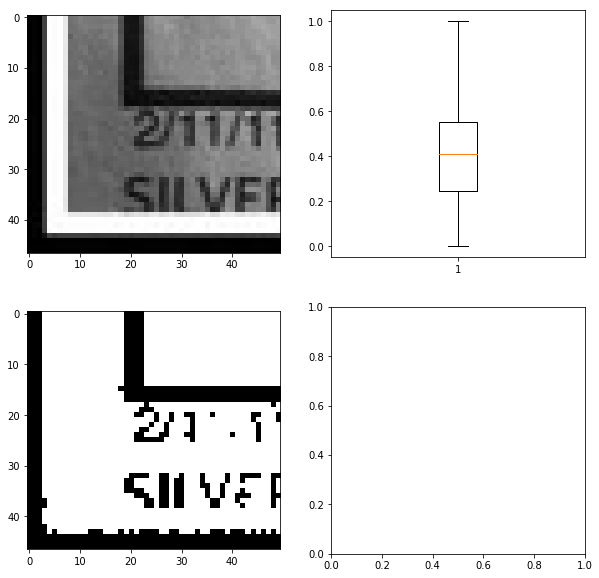

In [7]:
coin = rgb2grey(china[300:347,0:50])
r,c = coin.shape
fix, ax = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
ax[0][0].imshow(coin, cmap="gray")
ax[0][1].boxplot(coin.reshape(r*c))

q75, q25 = np.percentile(coin, [75 ,25])
iqr = q75 - q25 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print min , max , q25 , q75
#remove outliers
coin[coin<q25]=0
coin[coin>q25]=1

ax[1][0].imshow(coin, cmap="gray")
plt.show()

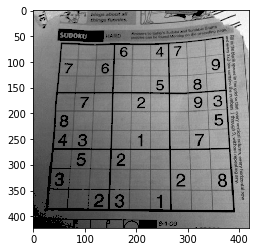

In [51]:
copycoin = np.copy(rgb2grey(china))
copycoin[copycoin < 0.2] = 0
#copycoin[copycoin > 0.3] = 1
plt.imshow(copycoin, cmap="gray")

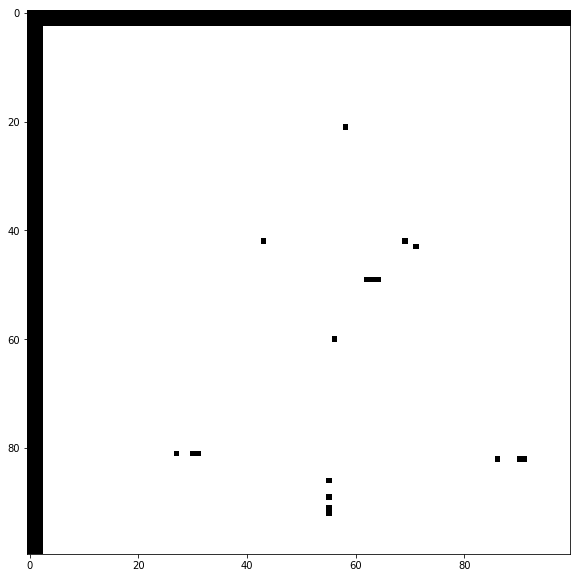

In [9]:
graycoin = rgb2grey(china)
def fundoo(coin):
    r,c = coin.shape
    fix, ax = plt.subplots(figsize=(10,10))
    q75, q25 = np.percentile(coin, [75 ,25])
    iqr = q75 - q25 
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    #remove outliers
    if min < 0:
        min = q25
    coin[coin<min]=0
    coin[coin>min]=1
    plt.imshow(coin, cmap="gray")
    plt.show()

fundoo(graycoin[0:100,0:100])

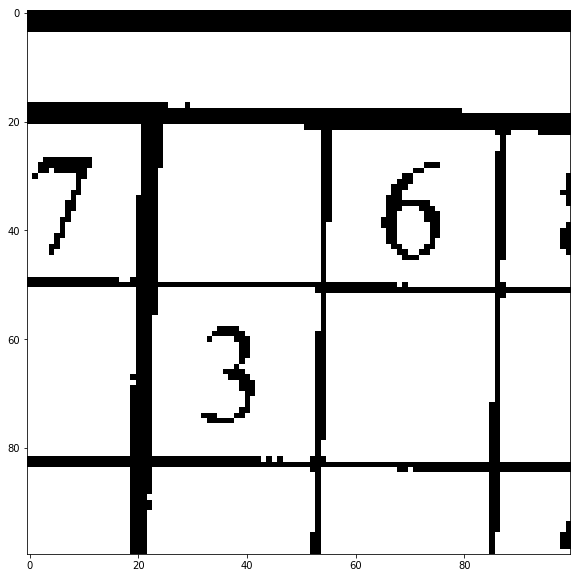

In [10]:
fundoo(graycoin[0:100,100:200])

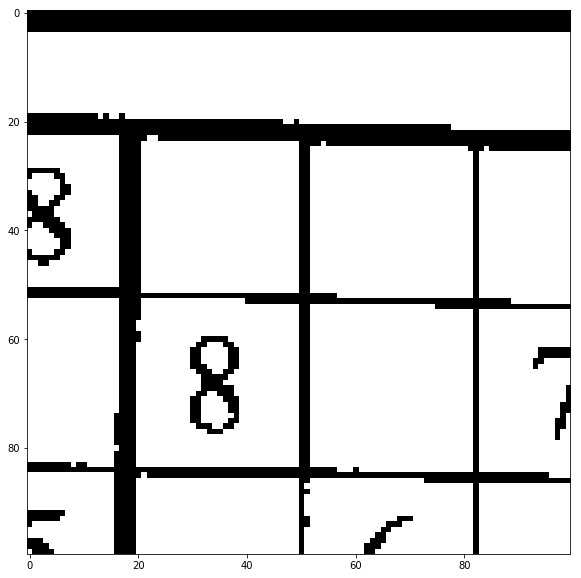

In [11]:
fundoo(graycoin[0:100,200:300])

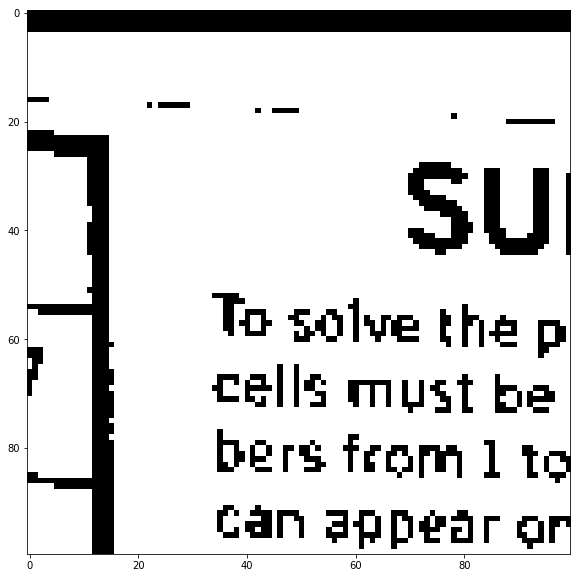

In [12]:
fundoo(graycoin[0:100,300:400])

In [13]:
fundoo(graycoin[0:100,300:400])

(347, 500, 3)

In [21]:
graycoin = rgb2grey(china)
def fundoo_replace(coin):
    r,c = coin.shape
    q75, q25 = np.percentile(coin, [75 ,25])
    iqr = q75 - q25 
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    #remove outliers
    if min < 0:
        min = q25
    coin[coin<min]=0
    coin[coin>min]=1
    
    return np.copy(coin)

r, c = graycoin.shape
for i in range(6):
    for j in range(9):
        rl = i*50
        cl = j*50
        
        ru = rl+50
        cu = cl+50
        
        if ru > r:
            ru = r
        if cu > c:
            cu = c
        
        graycoin[rl:ru, cl:cu] = fundoo_replace(graycoin[rl:ru, cl:cu])

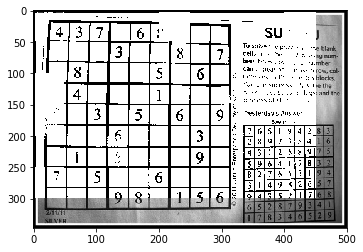

In [23]:
plt.imshow(graycoin, cmap="gray")

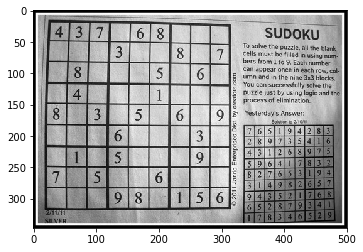

In [33]:
plt.imshow(rgb2grey(china),cmap="gray")

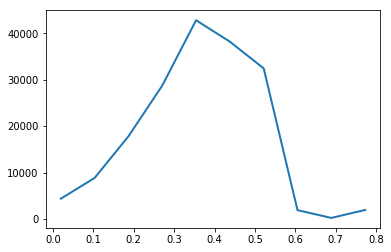

In [52]:
hist = np.histogram(rgb2grey(china))
plt.plot(hist[1][:-1], hist[0], lw=2)
plt.show()

In [40]:
allnums = rgb2grey(china).reshape(347*500)

In [44]:
print np.count_nonzero(allnums<0.3)
print np.count_nonzero(allnums>0.3)


30092
143408


In [ ]:
allnums[allnums<0.3] = 0